In [1]:
import pandas as pd
import os
import numpy as np
import datetime as dt

from os import listdir
from os.path import isfile, join

from babel.numbers import format_number

from matplotlib import dates

In [2]:
idx = pd.IndexSlice

___

# Data collection

## Inflow

[Import multiple excel at once](https://stackoverflow.com/questions/20908018/import-multiple-excel-files-into-python-pandas-and-concatenate-them-into-one-dat)

In [8]:
inflow_prodotti = r"C:\Users\Raffaele.Sportiello\OneDrive - Wolters Kluwer\Documents\Dashboard inflow\Dashboard inflow canali e prodotti\Source\inflow_prodotti\\"

onlyfiles = [f for f in listdir(r"C:\Users\Raffaele.Sportiello\OneDrive - Wolters Kluwer\Documents\Dashboard inflow\Dashboard inflow canali e prodotti\Source\inflow_prodotti") if isfile(join(r"C:\Users\Raffaele.Sportiello\OneDrive - Wolters Kluwer\Documents\Dashboard inflow\Dashboard inflow canali e prodotti\Source\inflow_prodotti", f))]

dfs = []
for file in onlyfiles:
    data = pd.read_excel(inflow_prodotti+file)
    dfs.append(data)

inflow = pd.concat(dfs, axis=0, ignore_index=True)
    
inflow.loc[:,["Cliente Merce", "Cliente FATTURA", "Codice PRODOTTO"]] = inflow.loc[:,["Cliente Merce", "Cliente FATTURA", "Codice PRODOTTO"]].apply(lambda x: x.astype(str))
inflow.rename(columns={"Data Ins. Ordine (monitoraggio)":"Giorno"}, inplace=True)

In [9]:
inflow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132574 entries, 0 to 132573
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Area (SW)             132574 non-null  object        
 1   Prodotto (SW)         132574 non-null  object        
 2   Soluzione (SW)        132574 non-null  object        
 3   Codice PRODOTTO       132574 non-null  object        
 4   Fornitura (SW)        132574 non-null  object        
 5   Gruppo Prodotti Ricl  132574 non-null  object        
 6   Agente dell'ORDINE    132574 non-null  object        
 7   Sales Director        132574 non-null  object        
 8   Canale di VENDITA     132572 non-null  object        
 9   Cliente Merce         132574 non-null  object        
 10  Cliente FATTURA       132574 non-null  object        
 11  Gruppo Conti Merce    132574 non-null  object        
 12  Segmento Aggregato    132574 non-null  object        
 13 

## Inflow per cliente

In [80]:
inflow_cliente = pd.read_excel(r"C:\Users\Raffaele.Sportiello\OneDrive - Wolters Kluwer\Documents\Analisi inflow\Data export\inflow_per_cliente_2021-2022.xlsb", na_values=["#"], dtype = {"Cliente FATTURA":object})


## Budget prodotti

In [6]:
budget_prodotti = r"C:\Users\Raffaele.Sportiello\OneDrive - Wolters Kluwer\Documents\Dashboard inflow\Dashboard inflow canali e prodotti\Source\budget_prodotti\\"

onlyfiles = [f for f in listdir(r"C:\Users\Raffaele.Sportiello\OneDrive - Wolters Kluwer\Documents\Dashboard inflow\Dashboard inflow canali e prodotti\Source\budget_prodotti") if isfile(join(r"C:\Users\Raffaele.Sportiello\OneDrive - Wolters Kluwer\Documents\Dashboard inflow\Dashboard inflow canali e prodotti\Source\budget_prodotti", f))]

bdg = pd.DataFrame()

for file in onlyfiles:
    data = pd.read_excel(budget_prodotti+file)
    bdg = bdg.append(data)

for col in bdg.select_dtypes(include=[object]).columns:
    bdg[col] = bdg[col].astype(str)

## Parametriche

[Import multiple excel at once and assign to multiple dataframes](https://stackoverflow.com/questions/58563546/pandas-save-multiple-sheets-into-separate-dataframes)

In [3]:
parametriche = r"C:\Users\Raffaele.Sportiello\OneDrive - Wolters Kluwer\Documents\Dashboard inflow\Parametriche\\"
onlyfiles = [f for f in listdir(r"C:\Users\Raffaele.Sportiello\OneDrive - Wolters Kluwer\Documents\Dashboard inflow\Parametriche") if isfile(join(r"C:\Users\Raffaele.Sportiello\OneDrive - Wolters Kluwer\Documents\Dashboard inflow\Parametriche", f))]

par = {}
for file in onlyfiles:
    file_name=file.split(".")[0]
    par[f"{file_name}"] = pd.read_excel(parametriche+file)

In [6]:
par.keys()

dict_keys(['Agente_ordine', 'Area_prodotto', 'Canale_vendita', 'Classificazione_codice_prodotto - New', 'Classificazione_codice_prodotto', 'Classificazione_mdm', 'Clienti_inside_sales', 'Esclusione_fatture', 'Esclusione_ordini', 'Forfait', 'Giorni_lavorativi', 'Linea_prodotti', 'Sales_director'])

## Salesforce accounts

In [26]:
accounts_sf = pd.read_csv(r"C:\Users\Raffaele.Sportiello\OneDrive - Wolters Kluwer\Documents\Salesforce\Data export\IT_all_accounts.csv", encoding='latin-1', sep=";")

***

<a id='merge_analisi_paghe'></a>
# Merge per analisi paghe

In [ ]:
df_= df.loc[df["Raccolto"].notna(), ['Cliente Merce', 'Area (SW)', 'Codice PRODOTTO', 'Soluzione (SW)', 'Sales Director', 'Linea Prodotti', 'Gruppo Conti Merce', 'Segmento Aggregato', "Agente dell'ORDINE", "Data Ins. Ordine (monitoraggio)", 'Raccolto']] 

df_["Codice PRODOTTO"] = df_["Codice PRODOTTO"].astype(str)
df_["Sales Director"] = df_["Sales Director"].astype(str)

par["Classificazione_codice_prodotto"]["Codice PRODOTTO"] = par["Classificazione_codice_prodotto"]["Codice PRODOTTO"].astype(str)
par["Sales_director"]["Sales Director"] = par["Sales_director"]["Sales Director"].astype(str)

df_= df_.merge(par["Classificazione_codice_prodotto"], on="Codice PRODOTTO", how="left").merge(par["Sales_director"], on="Sales Director", how="left")

df_["Cliente Merce"] = df_["Cliente Merce"].apply(lambda x: str(x).zfill(10))

clienti = pd.read_csv(r"C:\Users\Raffaele.Sportiello\OneDrive - Wolters Kluwer\Documents\Salesforce\Data export\IT_all_accounts.csv", encoding='latin-1', sep=";")

clienti.drop_duplicates(subset=["WK Account Number"], inplace=True)

clienti["Cliente Merce"] = clienti["WK Account Number"].str.split("-", expand=True)[1]

columns = ['Cliente Merce', 'Area (SW)',  'Soluzione (SW)', 'Prodotto (SW)', 'Codice PRODOTTO', 'Descrizione prodotto', 'Sub solution', 'Solution', 'Sales Director', 'Linea Prodotti', 'Gruppo Conti Merce', 'Segmento Aggregato', "Agente dell'ORDINE",'Data Ins. Ordine (monitoraggio)', 'Raccolto',  'Rete', 'Rete2', 'Rete3']

clients = df_.loc[:, columns].merge(clienti, how="left", on=["Cliente Merce"])

In [ ]:
clients.to_excel(r"C:\Users\Raffaele.Sportiello\OneDrive - Wolters Kluwer\Documents\Analisi clienti\Clienti_paghe\clienti_per_analisi_paghe_v2.xlsx", index=False)

In [ ]:
clients_gr_year = clients.groupby([clients["Data Ins. Ordine (monitoraggio)"].dt.year])

In [ ]:
clients.groupby([clients["Cliente Merce"]])["Raccolto"].pct_change()

___

# Top clients per budget

In [81]:
inflow_cliente["Cliente FATTURA"] = inflow_cliente["Cliente FATTURA"].astype(str).apply(lambda x: "IT-" + x.zfill(10))

sales_director = par["Sales_director"]

inflow_cliente = inflow_cliente.merge(accounts_sf.loc[:,["WK Account Number", "Account Name"]], how="left", left_on="Cliente FATTURA", right_on="WK Account Number").merge(sales_director, on="Sales Director", how="left")

In [84]:
inflow_cliente_to_xlsx = inflow_cliente.loc[: , ["Anno calendario", "Cliente FATTURA", 'Cliente Merce', "Account Name", "Gruppo Conti", "Gruppo Conti Merce", "Segmento Aggr. Padre", "Rete", "Area territoriale", "Area Prodotto",'Linea Prodotti', "Raccolto"]]

In [85]:
inflow_cliente_to_xlsx.to_excel(r"C:\Users\Raffaele.Sportiello\OneDrive - Wolters Kluwer\Documents\Budget\top_10_customers_2022_base_dati 2.xlsx", index=False)

___

# Inflow generato da fornitori  
L’obiettivo è quello di vedere l’inflow generato e compararlo con il costo dei fornitori esterni che gestiscono il delivery e capire la marginalità.

## Inflow generato da lista

In [80]:
clienti_appaltati = pd.read_excel(r"C:\Users\Raffaele.Sportiello\OneDrive - Wolters Kluwer\Documents\Dashboard inflow\Dashboard inflow canali e prodotti\Data export\Clienti_appaltati_fornitori.xlsx")

In [82]:
filt = (inflow["Giorno"].dt.year > 2020)
columns = ["Cliente Merce", "Linea Prodotti", "Giorno", "Raccolto"]

df = inflow.loc[filt, columns]
df["Cliente Merce"] = df["Cliente Merce"].astype(str).apply(lambda x: "IT-" + x.zfill(10))

In [83]:
linea_prodotti = par["Linea_prodotti"]

df = df.merge(linea_prodotti, how="left", on="Linea Prodotti")

In [98]:
df_gr = df.groupby(["Cliente Merce", df["Giorno"].dt.year, "Linea aggr"]).agg({"Raccolto":"sum"}).unstack([1,2])

In [99]:
clienti_appaltati.columns = pd.MultiIndex.from_product([clienti_appaltati.columns, [""],[""]])

In [100]:
clienti_appaltati.merge(df_gr, how="left", left_on="AccountNumber", right_index=True)

AccountNumber                                      Cliente          Name  \
                                                                                
                                                                                
0    IT-0001204473                       ALBERTO MAZZONETTO SNC  ALBASOFT SRL   
1    IT-0002286448                    ALDIERI AUTOTRASPORTI SPA  ALBASOFT SRL   
2    IT-0001977338            ALL SERVICES SOCIETA' COOPERATIVA  ALBASOFT SRL   
3    IT-0001820842                         ALPERIA BARTUCCI SRL  ALBASOFT SRL   
4    IT-0001877015                                 ATREX S.R.L.  ALBASOFT SRL   
..             ...                                          ...           ...   
504  IT-0001993588                        TRE B CONSULENZA SRLS    VERSYA SPA   
505  IT-0001607237                 TRENTO DE RIVALEYS VALENTINO    VERSYA SPA   
506  IT-0000050600  TRIVELLA AUTOTRASPORTI SOCIETA' COOPERATIVA    VERSYA SPA   
507  IT-0001157934                        TRYSED DI BENELLI SAS    VERSYA SPA   
508  IT-0001205146                                  VIGI 14 SPA    VERSYA SPA   

    Raccolto                          
        2021            2022          
     Lic+Fym Servizi Lic+Fym Servizi  
0      550.0  1500.0  4080.0   600.0  
1        NaN  8442.5     NaN   500.0  
2        NaN  3935.0  1800.0  1135.0  
3      240.0  4385.0  4050.0     0.0  
4        NaN     NaN     NaN     NaN  
..       ...     ...     ...     ...  
504      NaN     NaN   180.0   270.0  
505   1080.0   112.5   520.0   855.0  
506      NaN     NaN   600.0   300.0  
507      NaN   500.0     NaN   480.0  
508      NaN     NaN     NaN   300.0  

[509 rows x 7 columns]

In [102]:
clienti_appaltati.merge(df_gr, how="left", left_on="AccountNumber", right_index=True)\
.to_excel(r"C:\Users\Raffaele.Sportiello\OneDrive - Wolters Kluwer\Documents\Dashboard inflow\Dashboard inflow canali e prodotti\Speciali\Clienti_appaltati_fornitori.xlsx")

## Inflow generato da clienti Large Accounts

In [27]:
filt = (inflow["Giorno"].dt.year > 2020) & (inflow["Sales Director"] == "LARGE ACCOUNT")
columns = ["Cliente Merce", "Linea Prodotti", "Giorno", "Raccolto"]

df = inflow.loc[filt, columns]
df["Cliente"] = df["Cliente Merce"].astype(str).apply(lambda x: "IT-" + x.zfill(10))

In [28]:
linea_prodotti = par["Linea_prodotti"]

df = df.merge(linea_prodotti, how="left", on="Linea Prodotti").merge(accounts_sf, how="left", left_on="Cliente", right_on="WK Account Number")

In [32]:
df.groupby(["Cliente","Cliente Merce", "WK Account Number", "Account Name",  df["Giorno"].dt.year, "Linea"], dropna=False).agg({"Raccolto":"sum"}).unstack([4,5]).loc[idx[:,"165684",:,:],:]

Raccolto  \
Giorno                                                             2021   
Linea                                                           Lic+Fym   
Cliente       Cliente Merce WK Account Number Account Name                
IT-0000165684 165684        IT-0000165684     PROMO.TER UNIONE   1840.0   

                                                                        \
Giorno                                                                   
Linea                                                          Servizi   
Cliente       Cliente Merce WK Account Number Account Name               
IT-0000165684 165684        IT-0000165684     PROMO.TER UNIONE  2800.0   

                                                                        \
Giorno                                                            2022   
Linea                                                          Lic+Fym   
Cliente       Cliente Merce WK Account Number Account Name               
IT-0000165684 165684        IT-0000165684     PROMO.TER UNIONE     NaN   

                                                                        \
Giorno                                                                   
Linea                                                          Servizi   
Cliente       Cliente Merce WK Account Number Account Name               
IT-0000165684 165684        IT-0000165684     PROMO.TER UNIONE     NaN   

                                                                         
Giorno                                                             2021  
Linea                                                                HW  
Cliente       Cliente Merce WK Account Number Account Name               
IT-0000165684 165684        IT-0000165684     PROMO.TER UNIONE  10782.0

In [33]:
df.groupby(["Cliente","Cliente Merce", "WK Account Number", "Account Name",  df["Giorno"].dt.year, "Linea"], dropna=False).agg({"Raccolto":"sum"}).unstack([4,5]).to_excel(r"C:\Users\Raffaele.Sportiello\OneDrive - Wolters Kluwer\Documents\Dashboard inflow\Dashboard inflow canali e prodotti\Speciali\Clienti_large_accounts.xlsx")

___

# Top deals indiretta  

In [71]:
import pandas as pd
import os
import numpy as np
import datetime as dt
from os import listdir
from os.path import isfile, join
import calendar
idx = pd.IndexSlice


inflow_prodotti = r"C:\Users\Raffaele.Sportiello\OneDrive - Wolters Kluwer\Documents\Dashboard inflow\Dashboard inflow canali e prodotti\Source\inflow_prodotti\\"

onlyfiles = [f for f in listdir(r"C:\Users\Raffaele.Sportiello\OneDrive - Wolters Kluwer\Documents\Dashboard inflow\Dashboard inflow canali e prodotti\Source\inflow_prodotti") if isfile(join(r"C:\Users\Raffaele.Sportiello\OneDrive - Wolters Kluwer\Documents\Dashboard inflow\Dashboard inflow canali e prodotti\Source\inflow_prodotti", f))]

dfs = []
for file in onlyfiles:
    data = pd.read_excel(inflow_prodotti+file)
    dfs.append(data)

df = pd.concat(dfs, axis=0, ignore_index=True)

for col in df.select_dtypes(include=[object]).columns:
    df[col] = df[col].astype(str)


## Parametriche

parametriche = r"C:\Users\Raffaele.Sportiello\OneDrive - Wolters Kluwer\Documents\Dashboard inflow\Parametriche\\"
onlyfiles = [f for f in listdir(r"C:\Users\Raffaele.Sportiello\OneDrive - Wolters Kluwer\Documents\Dashboard inflow\Parametriche") if isfile(join(r"C:\Users\Raffaele.Sportiello\OneDrive - Wolters Kluwer\Documents\Dashboard inflow\Parametriche", f))]

par = {}
for file in onlyfiles:
    file_name=file.split(".")[0]
    par[f"{file_name}"] = pd.read_excel(parametriche+file)


## All accounts da Salesforce

accounts_sf = pd.read_csv(r"C:\Users\Raffaele.Sportiello\OneDrive - Wolters Kluwer\Documents\Salesforce\Data export\IT_all_accounts.csv", encoding='latin-1', sep=";")

# Deals

filt_rows = (df["Data Ins. Ordine (monitoraggio)"].dt.year == 2022)&(df["Raccolto"].notna())
columns = ["Cliente Merce", "Agente dell'ORDINE", "Sales Director", "Canale di VENDITA", "Codice PRODOTTO", "Linea Prodotti", "Numero Ordine", "Numero Fattura", "Data Ins. Ordine (monitoraggio)", "Raccolto"]

df_2022 = df.loc[filt_rows, columns].reset_index(drop=True)
df_2022["Sales Director"] = df_2022["Sales Director"].str.lower()
df_2022["Agente dell'ORDINE"] = df_2022["Agente dell'ORDINE"].str.lower()

esc_fatture = par["Esclusione_fatture"]
esc_fatture["Numero Fattura"] = esc_fatture["Numero Fattura"].astype(str)

esc_ordini = par["Esclusione_ordini"]
esc_ordini["Numero Ordine"] = esc_ordini["Numero Ordine"].astype(str)

sales_director = par["Sales_director"]
sales_director["Sales Director"] = sales_director.loc[:,"Sales Director"].str.lower()
sales_director = sales_director[["Sales Director", "Rete", "Area territoriale"]]

agente = par["Agente_ordine"]
agente["Codice agente"] = agente.loc[:,"Codice agente"].str.lower()

cod_prod = par["Classificazione_codice_prodotto"]
cod_prod["Codice PRODOTTO"] = cod_prod["Codice PRODOTTO"].apply(lambda x: str(x))
cod_prod = cod_prod.loc[:, ['MDM', 'GTM BDG', 'Solution','Sub solution','Descrizione prodotto',"Codice PRODOTTO"]]

li_prodotti = par["Linea_prodotti"]

inflow = df_2022.merge(esc_fatture, on="Numero Fattura", how="left").merge(esc_ordini, on="Numero Ordine", how="left").merge(li_prodotti, on="Linea Prodotti", how="left").merge(sales_director, on="Sales Director", how="left").merge(agente, how="left", left_on="Agente dell'ORDINE", right_on="Codice agente").merge(cod_prod, how="left", on="Codice PRODOTTO")

esclusioni = (inflow["Canale di VENDITA"] != "E-Commerce")&(inflow["Escludi fatture"].isna())&(inflow["Escludi ordine"].isna())

inflow = inflow.loc[esclusioni, ['Data Ins. Ordine (monitoraggio)', "Cliente Merce", "Numero Ordine", "Rete", "Area territoriale", 'Sales Director', "Agente dell'ORDINE_y","RSM Agente",'Linea', "MDM","Solution","Descrizione prodotto", 'Raccolto']].reset_index(drop=True)

inflow.rename(columns={"Data Ins. Ordine (monitoraggio)":'Giorno', "Agente dell'ORDINE_y":"Agenzia"}, inplace=True)

inflow["Cliente Merce"] = inflow["Cliente Merce"].astype(str).apply(lambda x: "IT-" + x.zfill(10))
inflow = inflow.merge(accounts_sf, how="left", left_on="Cliente Merce", right_on="WK Account Number")

filt = (inflow["Rete"].str.contains("Indiretta")) & (inflow["Giorno"].dt.date >= dt.date(dt.datetime.now().year,dt.datetime.now().month-1, 1)) & (inflow["Giorno"].dt.date <= dt.date(dt.datetime.now().year,dt.datetime.now().month-1, calendar.monthrange(dt.datetime.now().year,dt.datetime.now().month-1)[1]))
columns = ["Giorno","Numero Ordine","Cliente Merce","Account Name","Agenzia","Area territoriale","Rete","Linea","Solution","Raccolto"]

inflow_ind = inflow.loc[filt, columns]

inflow_ind["Valore Ordine"] = inflow_ind.groupby(["Numero Ordine"])["Raccolto"].transform("sum")

topdeals_ind = inflow_ind.groupby(["Numero Ordine","Account Name", "Cliente Merce", "Agenzia", "Area territoriale","Solution", inflow_ind["Giorno"]]).agg({"Raccolto":"sum", "Valore Ordine":"max"}).sort_values(by="Valore Ordine", ascending=False).reset_index()
#.style.format({"Raccolto":"{:,.0f}"})

topdeals_ind.rename(columns={"Account Name":"Nome cliente", "Cliente Merce":"Codice SAP", "Solution":"Prodotto", "Raccolto":"Inflow"}, inplace=True)
topdeals_ind = topdeals_ind.loc[topdeals_ind["Valore Ordine"] > 0, :].copy()

mese = str(topdeals_ind["Giorno"].astype("datetime64[M]").max()).split(" ")[0][:7]

# with pd.ExcelWriter(r"C:\Users\Raffaele.Sportiello\OneDrive - Wolters Kluwer\Documents\Dashboard inflow\Dashboard inflow canali e prodotti\Speciali\Top deals indiretta\Top deals indiretta.xlsx", engine="openpyxl") as writer:
#    topdeals_ind.to_excel(writer, sheet_name="topdeals_ind", index=False)


In [ ]:
import win32com.client as client

dashboard_inflow_indiretta = r"C:\Users\Raffaele.Sportiello\OneDrive - Wolters Kluwer\Documents\Dashboard inflow\Dashboard inflow canali e prodotti\Speciali\Top deals indiretta\Top deals indiretta.xlsx"

html_body = """
    <div>
          <p>Ciao Rossella,<br><br>
            in allegato trovi il file con l’elenco dei deal dell’indiretta del mese appena concluso.<br><br>
            Un saluto,<br>Raffaele<br><br></p>
    </div>
"""


outlook = client.Dispatch('Outlook.Application')
message = outlook.CreateItem(0)
message.To = "rossella.specia@wolterskluwer.com"
message.CC = "marco.bitossi@wolterskluwer.com"
message.Subject = 'Inflow indiretta'
message.HTMLBody = html_body
message.Attachments.Add(Source=dashboard_inflow_indiretta)

message.Display()

___

# Inflow trends

In [28]:
inflow_tot = inflow.groupby(inflow["Giorno"].astype("datetime64[M]")).agg({"Raccolto":"sum"})

In [29]:
inflow_tot = inflow_tot.loc[inflow_tot["Raccolto"]>0,:].copy()

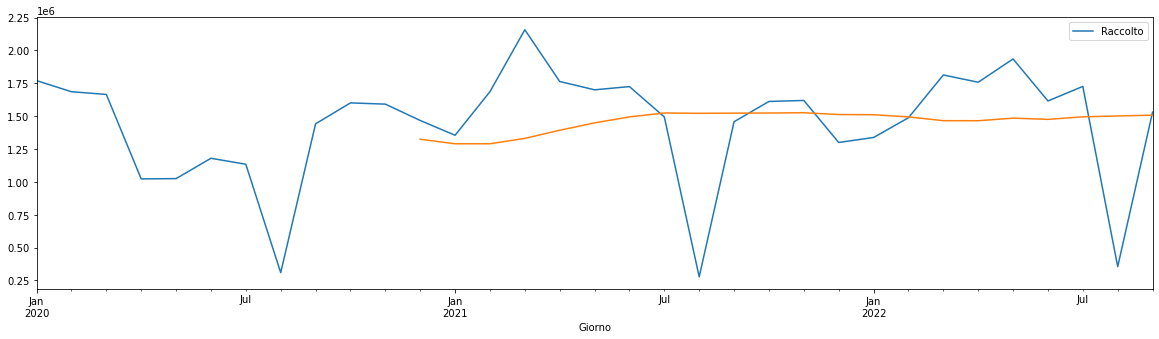

In [48]:
ax = inflow_tot.plot(figsize=(20,5)).autoscale(axis='x',tight=True)
ax = inflow_tot.rolling(window=12).mean()['Raccolto'].plot()
#inflow_tot.expanding(min_periods=1).mean()['Raccolto'].plot();


In [49]:
from statsmodels.tsa.filters.hp_filter import hpfilter

In [50]:
gdp_cycle, gdp_trend = hpfilter(inflow_tot, lamb=129600)

In [51]:
inflow_tot["Trend"] = gdp_trend

In [53]:
inflow_tot["Cycle"] = gdp_cycle

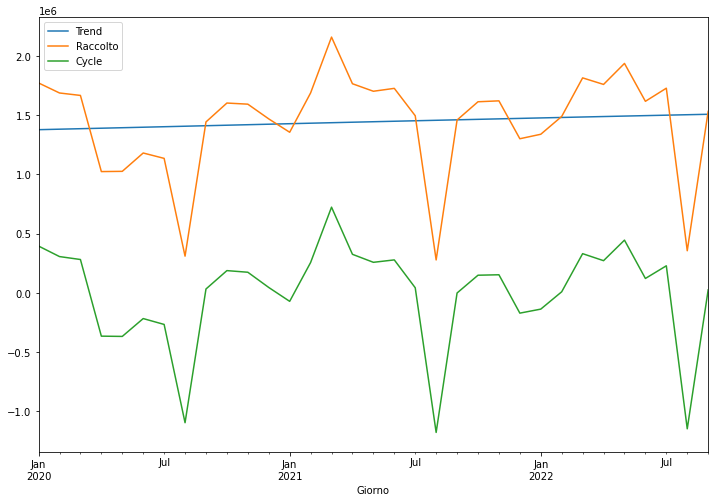

In [54]:
inflow_tot[['Trend','Raccolto','Cycle']]['2020-01-01':].plot(figsize=(12,8)).autoscale(axis='x',tight=True);

In [65]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

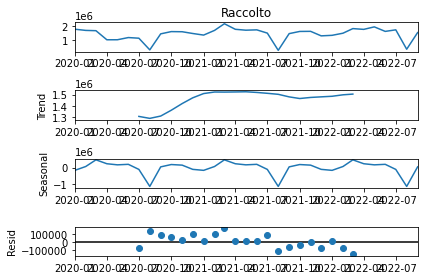

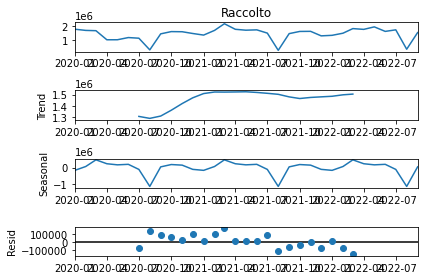

In [70]:
result = seasonal_decompose(inflow_tot['Raccolto'], model='additive')

#plt.subplots(1, 1, figsize=(8,8))

result.plot()

In [68]:
help(result)

Help on DecomposeResult in module statsmodels.tsa.seasonal object:

class DecomposeResult(builtins.object)
 |  DecomposeResult(observed, seasonal, trend, resid, weights=None)
 |  
 |  Results class for seasonal decompositions
 |  
 |  Parameters
 |  ----------
 |  observed : array_like
 |      The data series that has been decomposed.
 |  seasonal : array_like
 |      The seasonal component of the data series.
 |  trend : array_like
 |      The trend component of the data series.
 |  resid : array_like
 |      The residual component of the data series.
 |  weights : array_like, optional
 |      The weights used to reduce outlier influence.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, observed, seasonal, trend, resid, weights=None)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  plot(self, observed=True, seasonal=True, trend=True, resid=True, weights=False)
 |      Plot estimated components
 |      
 |      Parameters
 |      ----------
 |      

In [22]:
inflow_tot.style.format('{:,.0f}')

,Raccolto
Giorno,
2020-01-01 00:00:00,"1,770,756"
2020-02-01 00:00:00,"1,686,196"
2020-03-01 00:00:00,"1,665,544"
2020-04-01 00:00:00,"1,022,855"
2020-05-01 00:00:00,"1,024,854"
2020-06-01 00:00:00,"1,179,662"
2020-07-01 00:00:00,"1,134,327"
2020-08-01 00:00:00,"309,182"
2020-09-01 00:00:00,"1,441,868"
